# Titanic Lab

In [273]:
'''Importing the neded libraries'''

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

from __future__ import print_function
pd.options.display.float_format = '{:.2f}'.format

# Reading the CSV file into a Pandas Dataframe

In [274]:
titanic = pd.read_csv('train.csv', index_col='PassengerId')

In [275]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [276]:
'''Gathering general information on the Titanic DataFrame'''
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [277]:
'''Identifying the Columns that have missing/null values in the Pandas Dataframe'''
titanic.columns[titanic.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [278]:
'''Identifying columns that have missing/null values in the Dataframe, along with the associated counts'''
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [279]:
'''Converting the Pandas Series above into a Dataframe'''
Null_Titanic = pd.DataFrame(titanic.isnull().sum(), columns = ['Count'])
Null_Titanic

,Count
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


# Cleaning the Data

## Create a bar chart showing how many missing values are in each column


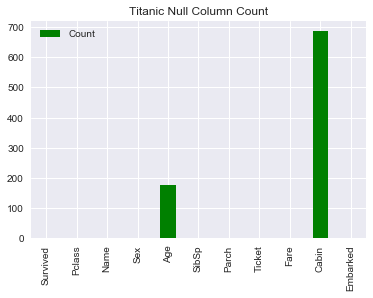

In [280]:
Null_Titanic.plot(kind='bar', title='Titanic Null Column Count', color = 'Green')

## Which column has the most NaN values? How many cells in that column are empty?

Based on looking at the graph above "Cabin" has the most null columns followed by "Age". Cabin has 687 null values and Age has 177 null values. Embarked column has 2 null values 

## Delete all rows where Embarked is empty

In [281]:
'''Identifying the Null Values in the Embarked Column'''
titanic[titanic['Embarked'].isnull()==True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.00,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.00,B28,NaN


In [282]:
print ('Original Titanic Dataframe Shape: ',  titanic.shape[0])
print ('Number of Columns with Null Embark Values: ', titanic[titanic['Embarked'].isnull()==True].shape[0])

titanic = titanic[titanic['Embarked'].isnull()==False]

print ('New Titanic Dataframe Shape: ',  titanic.shape[0])

Original Titanic Dataframe Shape:  891
Number of Columns with Null Embark Values:  2
New Titanic Dataframe Shape:  889


In [283]:
'''Check to see if there are any null values in the Embarked Column'''
titanic[titanic['Embarked'].isnull()==True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


There are no null values, hence the result above results an empty Dataframe

# Fill all empty cabins with ¯\(ツ)/¯

In [284]:
'''Replacing the Null Columns in the Cabin column with ¯\(ツ)/¯ '''
titanic.Cabin = titanic.Cabin.fillna('¯\(ツ)/¯')

In [285]:
'''Reviewing the first 20 columns in the Titanic Dataframe for the replacement made above'''
titanic.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,¯\(ツ)/¯,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,¯\(ツ)/¯,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,¯\(ツ)/¯,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.46,¯\(ツ)/¯,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,¯\(ツ)/¯,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,¯\(ツ)/¯,S


# Feature Extraction

### There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called FamilyCount which will be the sum of those two columns.

In [286]:
'''Adding a new column to the dataframe to get the family count'''
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']

In [287]:
'''Reviewing select rows in the dataframe for the newly added column'''
titanic.loc[8:15,:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
PassengerId,,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,¯\(ツ)/¯,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,¯\(ツ)/¯,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,¯\(ツ)/¯,C,1
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.70,G6,S,2
12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.55,C103,S,0
13,0,3,"Saundercock, Mr. William Henry",male,20.00,0,0,A/5. 2151,8.05,¯\(ツ)/¯,S,0
14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.27,¯\(ツ)/¯,S,6
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.85,¯\(ツ)/¯,S,0


### Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.

In [288]:
'''Checking for Names with Rev. in it'''
titanic[titanic['Name'].str.contains('Rev.')==True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
PassengerId,,,,,,,,,,,,
150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.00,0,0,244310,13.00,¯\(ツ)/¯,S,0
151,0,2,"Bateman, Rev. Robert James",male,51.00,0,0,S.O.P. 1166,12.53,¯\(ツ)/¯,S,0
250,0,2,"Carter, Rev. Ernest Courtenay",male,54.00,1,0,244252,26.00,¯\(ツ)/¯,S,1
627,0,2,"Kirkland, Rev. Charles Leonard",male,57.00,0,0,219533,12.35,¯\(ツ)/¯,Q,0
849,0,2,"Harper, Rev. John",male,28.00,0,1,248727,33.00,¯\(ツ)/¯,S,1
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,¯\(ツ)/¯,S,0


In [289]:
'''Creating a new column for Reverend and assigning a value 1 to it'''
titanic['IsReverend'] = np.where(titanic['Name'].str.contains('Rev.')==True, 1, 0)

In [290]:
'''Reviewing to see whether the flag is set for Reverends'''
titanic[titanic['Name'].str.contains('Rev.')==True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
PassengerId,,,,,,,,,,,,,
150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.00,0,0,244310,13.00,¯\(ツ)/¯,S,0,1
151,0,2,"Bateman, Rev. Robert James",male,51.00,0,0,S.O.P. 1166,12.53,¯\(ツ)/¯,S,0,1
250,0,2,"Carter, Rev. Ernest Courtenay",male,54.00,1,0,244252,26.00,¯\(ツ)/¯,S,1,1
627,0,2,"Kirkland, Rev. Charles Leonard",male,57.00,0,0,219533,12.35,¯\(ツ)/¯,Q,0,1
849,0,2,"Harper, Rev. John",male,28.00,0,1,248727,33.00,¯\(ツ)/¯,S,1,1
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,¯\(ツ)/¯,S,0,1


### In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using pd.get_dummies

In [291]:
new_titanic_df = pd.get_dummies(data=titanic, columns=['IsReverend'])

###  Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column

In [292]:
new_titanic_df = pd.get_dummies(data=new_titanic_df, columns=['Embarked'])

### Create dummy column for "Sex" 

In [293]:
new_titanic_df = pd.get_dummies(data=new_titanic_df, columns=['Sex'])

### BONUS: Extract the title from everyone's name and create dummy columns

##### This step is to create a column name "Title" and grab the title from the Name column

In [294]:
def get_title(x): 
    title =  str(x.rsplit(',')[1].rsplit('.')[0])
    return title + '.'
'''Using the apply function on the series to extract the title names'''
new_titanic_df['Title'] = new_titanic_df['Name'].apply(get_title)
new_titanic_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend_0,IsReverend_1,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.00,1,0,A/5 21171,7.25,¯\(ツ)/¯,1,1,0,0,0,1,0,1,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00,1,0,PC 17599,71.28,C85,1,1,0,1,0,0,1,0,Mrs.
3,1,3,"Heikkinen, Miss. Laina",26.00,0,0,STON/O2. 3101282,7.92,¯\(ツ)/¯,0,1,0,0,0,1,1,0,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00,1,0,113803,53.10,C123,1,1,0,0,0,1,1,0,Mrs.
5,0,3,"Allen, Mr. William Henry",35.00,0,0,373450,8.05,¯\(ツ)/¯,0,1,0,0,0,1,0,1,Mr.


#### This step is to create the dummy column on the Title Column

In [295]:
new_titanic = pd.get_dummies(data=new_titanic_df, columns=['Title'])

In [296]:
'''Reviewing the Columns in the New Titanic Dataset'''
new_titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'FamilyCount', 'IsReverend_0', 'IsReverend_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Title_ Capt.',
       'Title_ Col.', 'Title_ Don.', 'Title_ Dr.', 'Title_ Jonkheer.',
       'Title_ Lady.', 'Title_ Major.', 'Title_ Master.', 'Title_ Miss.',
       'Title_ Mlle.', 'Title_ Mme.', 'Title_ Mr.', 'Title_ Mrs.',
       'Title_ Ms.', 'Title_ Rev.', 'Title_ Sir.', 'Title_ the Countess.'],
      dtype='object')

# Step 4: Exploratory analysis

Note: The original dataframe 'titanic' is still intact with the original column names. A new dataframe was created in step 3 

#### Creating a Survival Dictionary for the purposes of readability 

In [297]:
survival_dict = {0: 'DNS', 1: 'S'}

### What was the survival rate overall?

### What was the survival rate overall?

In [298]:
titanic['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [299]:
total_survived_df = pd.DataFrame(titanic['Survived'].value_counts(),)
total_survived_df

,Survived
0,549
1,340


In [300]:
total_survived_df['Percentage of Survival'] = total_survived_df['Survived']/total_survived_df['Survived'].sum()
total_survived_df

,Survived,Percentage of Survival
0,549,0.62
1,340,0.38


Based on the results in the dataframe above the overall rate of survival is 38% 

### Which gender fared the worst? What was their survival rate?

In [301]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,¯\(ツ)/¯,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,¯\(ツ)/¯,S,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,¯\(ツ)/¯,S,0,0


In [302]:
gender_survived = pd.DataFrame(titanic.groupby(['Survived', 'Sex']).count()['Name']) 
gender_survived.rename(columns = {'Name': 'Count'}, inplace=True)
gender_survived['Percent of Survival'] = gender_survived['Count']/ gender_survived['Count'].sum()
gender_survived

Count  Percent of Survival
Survived Sex                               
0        female     81                 0.09
         male      468                 0.53
1        female    231                 0.26
         male      109                 0.12

The male gender had the worst rate of survival among the total population. The survival rate among male was a mere 12% even though the total number of males outnumbered the female population. Part of the reason could also be that the males in the ship were incharge of getting the females to a safe zone by risking their own lifes. 

### What was the survival rate for each Pclass?

In [303]:
PClass_Survived = pd.DataFrame(titanic.groupby(['Survived', 'Pclass']).count()['Name'])
PClass_Survived.rename(columns = {'Name': 'Count'}, inplace=True)
PClass_Survived['Percent of Survival'] = PClass_Survived['Count']/PClass_Survived['Count'].sum()
PClass_Survived

Count  Percent of Survival
Survived Pclass                            
0        1          80                 0.09
         2          97                 0.11
         3         372                 0.42
1        1         134                 0.15
         2          87                 0.10
         3         119                 0.13

The survival rate amount PClass 1,2 & 3 is 15%, 10% and 13% of the total population 

### Did any reverends survive? How many?

In [304]:
titanic.loc[titanic['IsReverend'] == 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
PassengerId,,,,,,,,,,,,,
150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.00,0,0,244310,13.00,¯\(ツ)/¯,S,0,1
151,0,2,"Bateman, Rev. Robert James",male,51.00,0,0,S.O.P. 1166,12.53,¯\(ツ)/¯,S,0,1
250,0,2,"Carter, Rev. Ernest Courtenay",male,54.00,1,0,244252,26.00,¯\(ツ)/¯,S,1,1
627,0,2,"Kirkland, Rev. Charles Leonard",male,57.00,0,0,219533,12.35,¯\(ツ)/¯,Q,0,1
849,0,2,"Harper, Rev. John",male,28.00,0,1,248727,33.00,¯\(ツ)/¯,S,1,1
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,¯\(ツ)/¯,S,0,1


From the results of the Dataframe above we can confirm that there were 6 Reverends on board, and none of them survived

### What is the survival rate for cabins marked ¯\(ツ)/¯

In [305]:
No_Cabin_Survived = titanic.loc[titanic['Cabin'] == '¯\(ツ)/¯', :]
No_Cabin_Survived = pd.DataFrame(No_Cabin_Survived.groupby(['Survived']).count()['Name'])
No_Cabin_Survived.rename(columns={'Name': 'Count'}, inplace=True)
No_Cabin_Survived['Percent of Survival'] = No_Cabin_Survived['Count']/ No_Cabin_Survived['Count'].sum()
No_Cabin_Survived

,Count,Percent of Survival
Survived,,
0,481,0.70
1,206,0.30


Based on the Dataframe above the survival rate for Cabins marked ¯\(ツ)/¯ is close to 30% 

### What is the survival rate for people whose Age is empty?

In [306]:
No_Age_Survival = titanic.loc[titanic.Age.isnull(), : ]
No_Age_Survival = pd.DataFrame(No_Age_Survival.groupby(['Survived']).count()['Name'])
No_Age_Survival.rename(columns = {'Name': 'Count'}, inplace=True)
No_Age_Survival['Percent of Survival'] = No_Age_Survival['Count']/No_Age_Survival['Count'].sum()
No_Age_Survival

,Count,Percent of Survival
Survived,,
0,125,0.71
1,52,0.29


The Survival Rate amount people whose Age is empty is around 29% 

### What is the survival rate for each port of embarkation?

In [307]:
Embarked_Survival = pd.DataFrame(titanic.groupby(['Survived', 'Embarked']).count()['Name']) 
Embarked_Survival.rename(columns={'Name': 'Count'}, inplace=True)
Embarked_Survival['Percent of Survival'] = Embarked_Survival['Count']/ Embarked_Survival['Count'].sum()
Embarked_Survival

Count  Percent of Survival
Survived Embarked                            
0        C            75                 0.08
         Q            47                 0.05
         S           427                 0.48
1        C            93                 0.10
         Q            30                 0.03
         S           217                 0.24

Based on the review of the Dataframe above "Southampton" had the most survival rate, followed by "Cherbourg" and "Queenstown" ..  

### What is the survival rate for children (under 12) in each Pclass?

In [308]:
titanic_under12 = pd.DataFrame(titanic.loc[titanic['Age'] < 12, :].groupby('Pclass').count()['Name'])
titanic_under12.rename(columns={'Name': 'Count'}, inplace=True)
titanic_under12['Percent Survival'] = titanic_under12['Count']/titanic_under12['Count'].sum()
titanic_under12

,Count,Percent Survival
Pclass,,
1,4,0.06
2,17,0.25
3,47,0.69


### Did the captain of the ship survive? Is he on the list?

In [309]:
titanic.loc[titanic['Name'].str.contains('Capt'), :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
PassengerId,,,,,,,,,,,,,
746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71.00,B22,S,2,0


Based on prior knowledge of the titanic, we know that the captain of the ship did not survive. The name of the captain was Edward J Smith; based on some priliminary analysis, I was not able to find this person in the dataset. However I was able to find another person whose first name was also Edward and was also the captain of the ship. From looking at the Survival flag for this person we are able to confirm that the person did not survive

### Of all the people that died, who had the most expensive ticket? How much did it cost?

In [310]:
titanic.loc[titanic['Survived'] == 0, :].sort_values('Fare', ascending=False)[:5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
PassengerId,,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.00,C23 C25 C27,S,5,0
439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.00,C23 C25 C27,S,5,0
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.52,B58 B60,C,1,0
558,0,1,"Robbins, Mr. Victor",male,nan,0,0,PC 17757,227.53,¯\(ツ)/¯,C,0,0
528,0,1,"Farthing, Mr. John",male,nan,0,0,PC 17483,221.78,C95,S,0,0


The most expensive ticket cost 263 . There were two people on board who paid 263, both were males, one was 19 and the other was 64

### Does having family on the boat help or hurt your chances of survival?

In [311]:
def family_populator(familycount): 
    if familycount > 0: 
        return "Family Onboard"
    else: 
        return "Solo Traveller"
    
titanic['Family Details'] = titanic['FamilyCount'].apply(family_populator)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Family Details
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,¯\(ツ)/¯,S,1,0,Family Onboard
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1,0,Family Onboard
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,¯\(ツ)/¯,S,0,0,Solo Traveller
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1,0,Family Onboard
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,¯\(ツ)/¯,S,0,0,Solo Traveller


In [312]:
family_on_board = pd.DataFrame(titanic.groupby(['Survived', 'Family Details']).count()['Name'])
family_on_board.rename(columns = {'Name': 'Count'}, inplace = True)
family_on_board['Percent of Survival'] = family_on_board['Count']/ family_on_board['Count'].sum()
family_on_board

Count  Percent of Survival
Survived Family Details                            
0        Family Onboard    175                 0.20
         Solo Traveller    374                 0.42
1        Family Onboard    179                 0.20
         Solo Traveller    161                 0.18

Based on the results of the dataframe above it looks like having some kind of a family on board might help the changes of survival

# Step 5: Plotting

#### Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

Before analyzing potential survival rates, one of the first step involves analyzing the data in hand. While a lot of the analysis was done in step 3, we are going to make some plots to see the visual representation of the data to a better assessment 

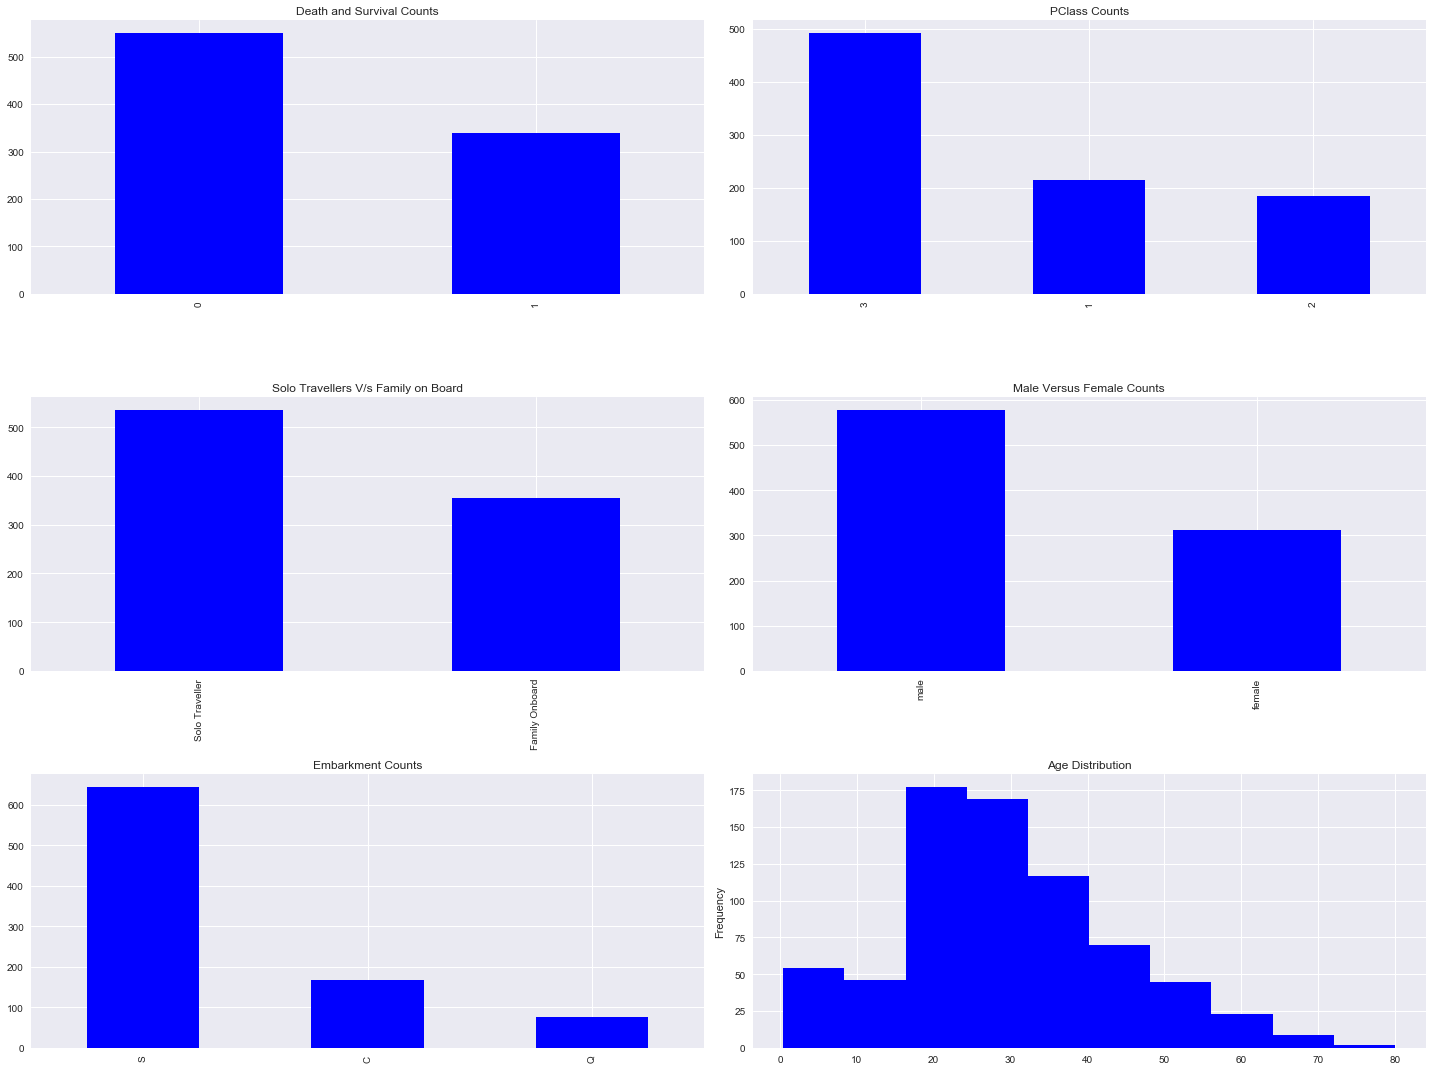

In [313]:
fig = plt.figure(figsize=(20,20))


plt.subplot(4,2,1)
titanic['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts', color ='Blue')

plt.subplot(4,2,2)
titanic['Pclass'].value_counts().plot(kind='bar', 
                                         title='PClass Counts', color ='Blue')

plt.subplot(4,2,3)
titanic['Family Details'].value_counts().plot(kind='bar', 
                                         title='Solo Travellers V/s Family on Board', color ='Blue')


plt.subplot(4,2,4)
titanic['Sex'].value_counts().plot(kind='bar', 
                                         title='Male Versus Female Counts', color ='Blue')


plt.subplot(4,2,5)
titanic['Embarked'].value_counts().plot(kind='bar', 
                                         title='Embarkment Counts', color ='Blue')

plt.subplot(4,2,6)
titanic['Age'].plot(kind='hist', title='Age Distribution', color ='Blue')

plt.tight_layout()

Now that we have a fair understanding of the data, we shall analyze the features (columns) to assess the potential impact on the survival rate. To assess the survival rate with respect to the other categories we are going to use a series of crosstabs 

# Passenger Class & Survival Rate

The analysis below focusses on the Survival Rate based on the passenger class or in other words, does travelling in a specific class increase odds of survival

In [314]:
''' Creating crosstabs between Passenger Class and Survival Rate'''
PClass_Survival = pd.crosstab(titanic['Pclass'], titanic['Survived'])
PClass_Survival

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


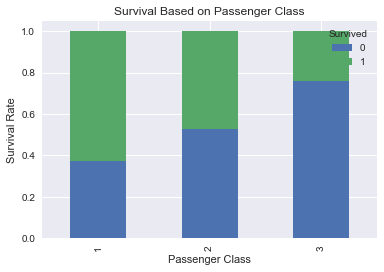

In [315]:
P_Class_Survival_N = PClass_Survival.div(PClass_Survival.sum(1), axis = 0)
P_Class_Survival_N.plot(kind='bar', stacked=True, title = 'Test')

plt.title('Survival Based on Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In the plot above we see that the passengers in class 1 had a better chance of survival as compared to the passengers in the other classes (class 2 & 3). 

We try to pivot the crosstab created earlier to see if we see similar results 

In [316]:
PClass_Survival = pd.crosstab(titanic['Survived'], titanic['Pclass'])
PClass_Survival

Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


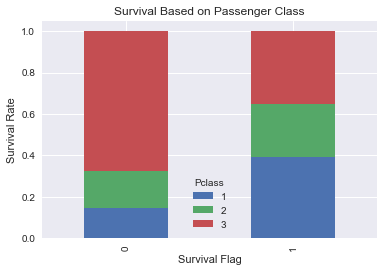

In [317]:
P_Class_Survival_N = PClass_Survival.div(PClass_Survival.sum(1).astype(float), axis = 0)
P_Class_Survival_N.plot(kind='bar', stacked=True)

plt.title('Survival Based on Passenger Class')
plt.xlabel('Survival Flag')
plt.ylabel('Survival Rate')



The results above confirm the hypothesis that travelling in first class does increase the chances of survival in general

# Gender & Survival Rate

In [318]:
Gender_Survival = pd.crosstab(titanic['Sex'], titanic['Survived'])
Gender_Survival

Survived,0,1
Sex,,
female,81,231
male,468,109


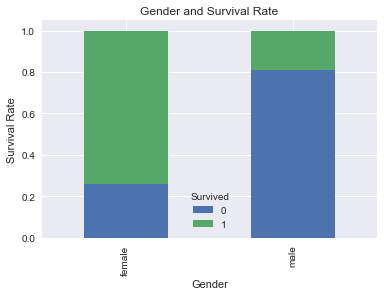

In [319]:
normalized_gender_survival = Gender_Survival.div(Gender_Survival.sum(1), axis = 0)
normalized_gender_survival.plot(kind='bar', stacked = True)

plt.title('Gender and Survival Rate')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

Based on the plot we can make a fair assumption that females had a better chance of survival compared to the males. 

# Family Onboard and Survival Rate

In [320]:
Family_Onboard_Survival = pd.crosstab(titanic['Family Details'],titanic['Survived'])
Family_Onboard_Survival

Survived,0,1
Family Details,,
Family Onboard,175,179
Solo Traveller,374,161


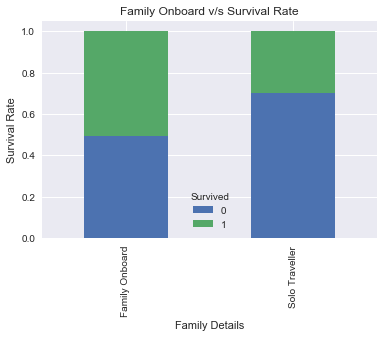

In [321]:
Normalized_Family_Onboard_Survival = Family_Onboard_Survival.div(Family_Onboard_Survival.sum(1), axis = 0)
Normalized_Family_Onboard_Survival.plot(kind='bar', stacked = True)

plt.title('Family Onboard v/s Survival Rate')
plt.xlabel('Family Details')
plt.ylabel('Survival Rate')

# Embarkment and Survival Rate

In [322]:
Embarkment_SurvivalRate = pd.crosstab(titanic['Embarked'], titanic['Survived'])
Embarkment_SurvivalRate


Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


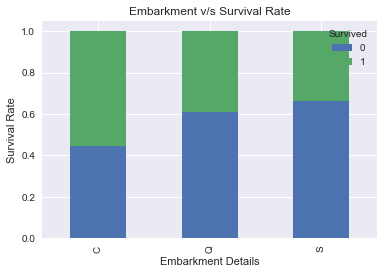

In [323]:
Embarkment_SurvivalRate = Embarkment_SurvivalRate.div(Embarkment_SurvivalRate.sum(1), axis = 0)
Embarkment_SurvivalRate.plot(kind='bar', stacked = True)


plt.title('Embarkment v/s Survival Rate')
plt.xlabel('Embarkment Details')
plt.ylabel('Survival Rate')

It appears those that embarked in location 'C': 1 had the highest rate of survival

# Age V/s Survival Rate

The Age column has a lot of Null Values. Hence to get better results with the analysis, we could either remove the null values or we could impute the missing values so that the values are not null. This process is called as imputation. In this example we are going to impute the missing values with the median age. 

In [324]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

The code below checks to see if there are any null values in the Age column. The result should be zero as we did the imputation in the previous step

In [325]:
titanic['Age'].isnull().sum()

0

The analysis below will not use the crosstab, but will try to do the analysis with the following approach 

1. Estimate the distribution of Survival Rate among the entire Population 
2. Estimate the distribution of Survival Rate among the entire Females 
3. Estimate the distribution of Survival Rate among the entire Males 



### Overall Survival Distribution

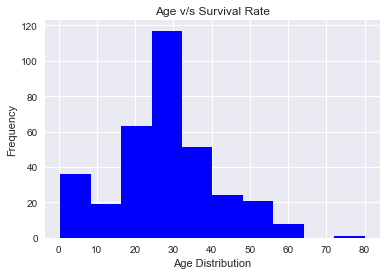

In [326]:
survived_population = titanic.loc[titanic['Survived'] == 1, :] 

survived_population['Age'].plot(kind='hist', color ='Blue')

plt.title('Age v/s Survival Rate')
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')


### Survival Distribution among Males 

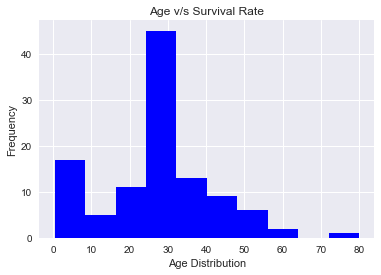

In [327]:
survived_male_population = titanic.loc[(titanic['Survived'] == 1) & (titanic['Sex'] == 'male'), :] 

survived_male_population['Age'].plot(kind='hist', color ='Blue')

plt.title('Age v/s Survival Rate')
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')

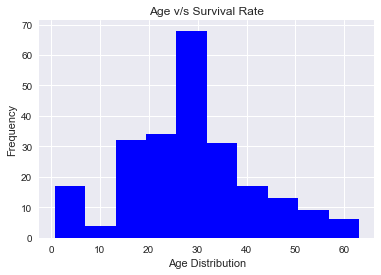

In [328]:
survived_female_population = titanic.loc[(titanic['Survived'] == 1) & (titanic['Sex'] == 'female'), :] 

survived_female_population['Age'].plot(kind='hist', color ='Blue')

plt.title('Age v/s Survival Rate')
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')

On preliminary analysis, we see that the population in the age groups between 30 and 40 had a better chance of survival.We came to this conclusion based on looking at the overal age distribution, and age distribution between the males and the females for the survived passengers 

# Conclusion 

Based on preliminary data analysis of the titanic dataset, we can confirm that 

* Passengers in First Class had a better rate of survival compared to the passengers in the other classes 
* Female passengers had a better survival rate compared to the Males 
* Passengers who had family members onboard had a better rate of survival compared to the solo travellers 
* Passengers who embarked in Cherbourg had a better rate of survival 
* Passengers who aged between 30 and 40 had a better rate of survival

# Next Steps

The preliminary analysis does provide some good insight, however as next step the analysis should focus on using a more machine learning approach (probably using some of pythons machine learning module like scikit learn). The test should focus on splitting the data into test set and training set. The training set could be used to build a model to predict survival and the test set could be used to test the validity of the model 